importing relevant Library

In [219]:
import pandas as pd

In [220]:
import numpy as np

In [221]:
import matplotlib.pyplot as plt

In [222]:
import seaborn as sns

In [223]:
import warnings

In [224]:
warnings.filterwarnings('ignore')

Loading the Data

In [225]:
car_raw=pd.read_csv("1.04. Real-life example.csv")

In [226]:
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Preprocessing

In [227]:
car_raw.describe(include='all')
#for getting categorical column also

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [228]:
# car_raw.drop('Model',axis=1,inplace=True)


In [229]:
car_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Checking Missing Values

In [230]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [231]:
car_raw.dropna(axis=0,inplace=True)

EDA

Text(0.5, 1.0, 'Car Price Distribution')

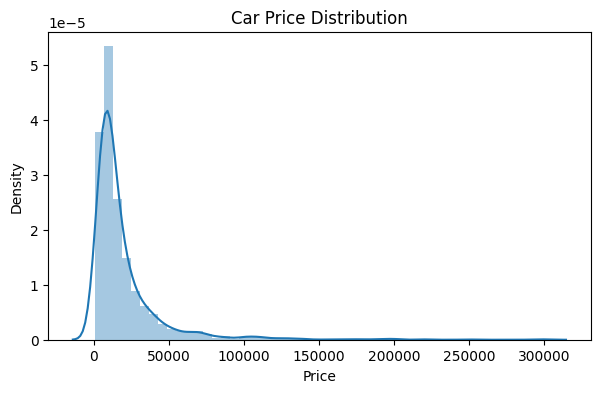

In [232]:
plt.figure(figsize=(7,4))
sns.distplot(car_raw['Price']);
plt.title('Car Price Distribution')

Dealing with outlier

In [233]:
q=car_raw['Price'].quantile(q=0.99)
q

129812.51999999981

In [234]:
car_1=car_raw[car_raw['Price']<q]
car_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


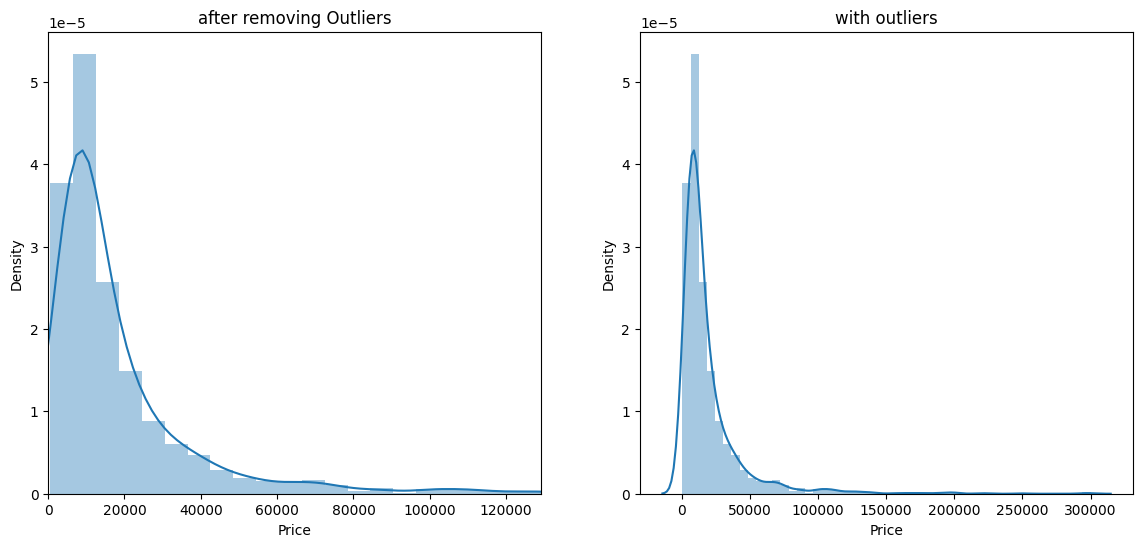

In [235]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(car_raw['Price']);
plt.title('after removing Outliers');
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.distplot(car_raw['Price'])
plt.title('with outliers');

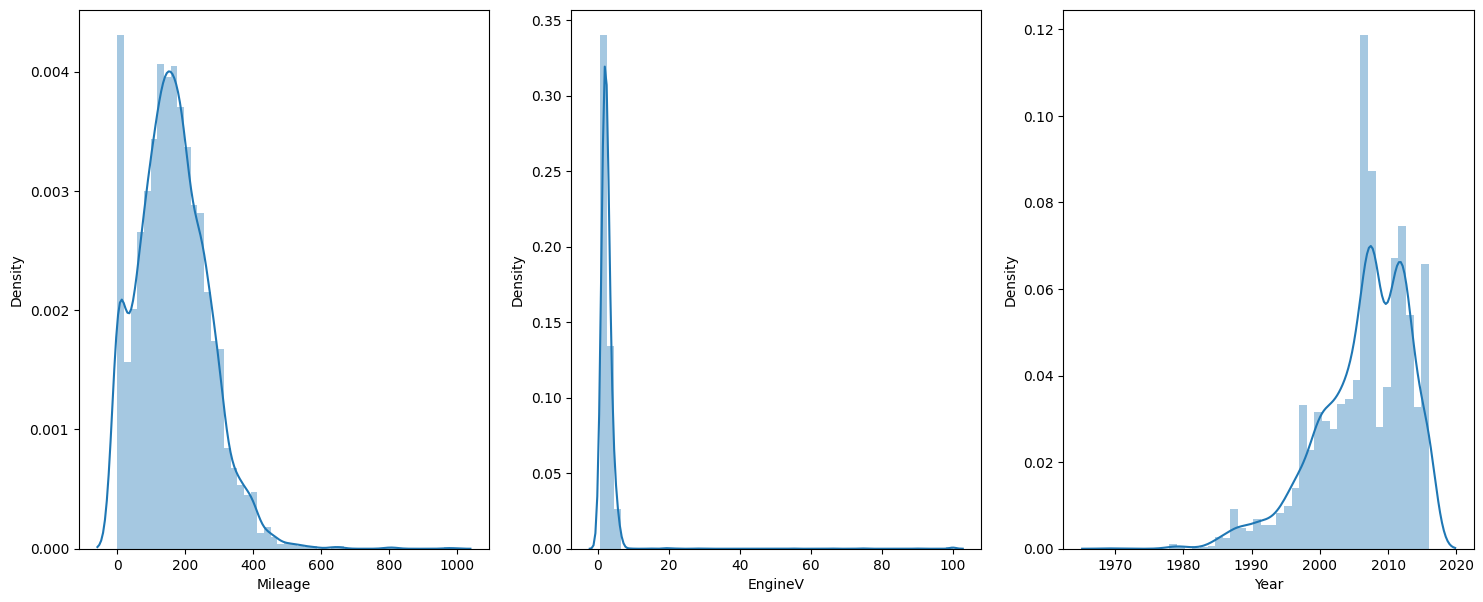

In [236]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.distplot(car_1['Mileage']);

plt.subplot(1,3,2)
sns.distplot(car_raw['EngineV']);

plt.subplot(1,3,3)
sns.distplot(car_raw['Year']);

In [237]:
q=car_1['Mileage'].quantile(q=0.99)
car_2=car_1[car_1['Mileage']<q]

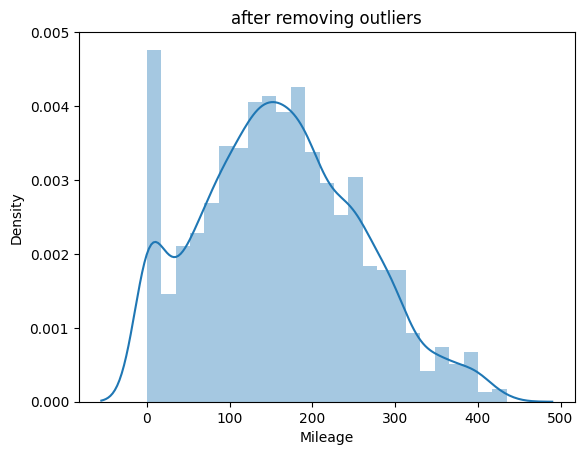

In [238]:
sns.distplot(car_2['Mileage']);
plt.title('after removing outliers');

The EngineV

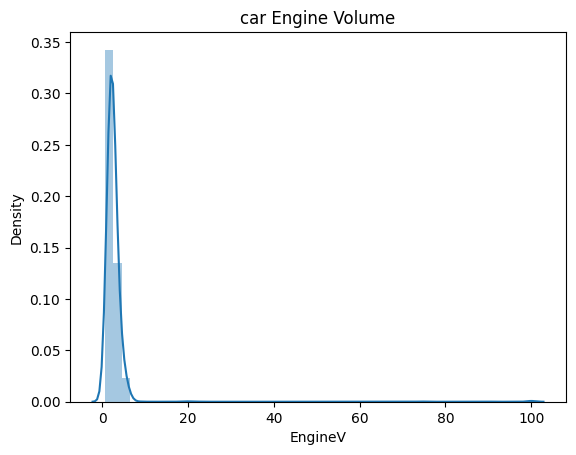

In [239]:
sns.distplot(car_2['EngineV']);
plt.title('car Engine Volume');

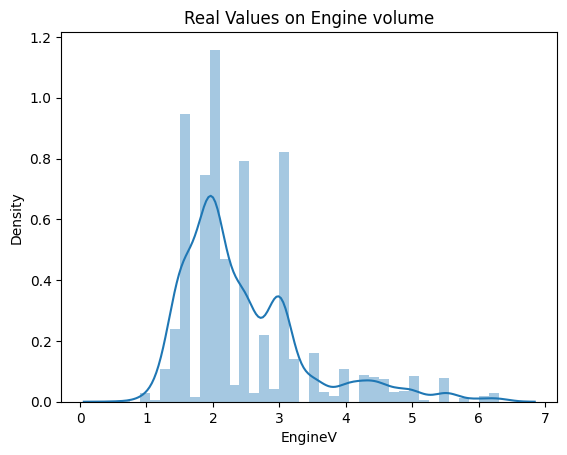

In [240]:
car_3=car_2[car_2['EngineV']<6.5]

sns.distplot(car_3['EngineV']);
plt.title('Real Values on Engine volume');

Year

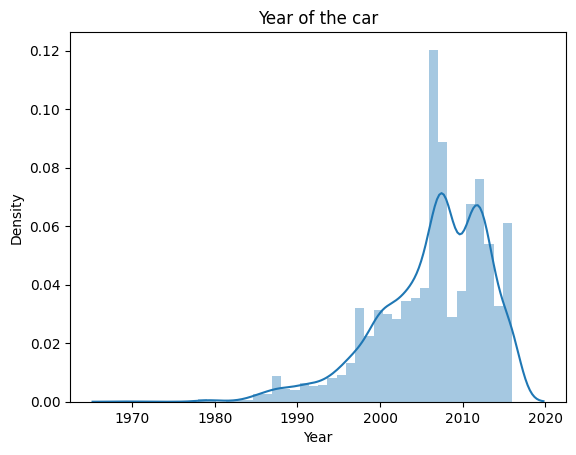

In [241]:
sns.distplot(car_3['Year']);
plt.title('Year of the car');

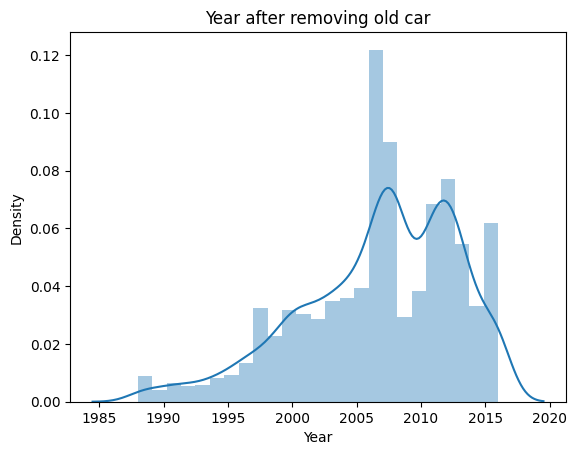

In [242]:
q=car_3['Year'].quantile(q=0.01)
car_4=car_3[car_3['Year']>q]

sns.distplot(car_4['Year']);
plt.title('Year after removing old car');


In [243]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [244]:
car_clean=car_4.reset_index(drop=True)

In [245]:
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [246]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [247]:
car_raw.shape[0] - car_clean.shape[0]

158

In [248]:
car_clean.to_csv('Car_cleaned.csv',index=False)
print('data saved ')

data saved 


In [249]:
car=pd.read_csv("Car_cleaned.csv")
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [250]:
# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# sns.scatterplot(x=car['Year'],y=car['Price']);
# plt.title('Year Vs Price');

# plt.subplot(1,3,2)
# sns.scatterplot(x=car['EngineV'],y=car['Price']);
# plt.title('EngineV Vs Price');

# plt.subplot(1,3,3)
# sns.scatterplot(x=car['Mileage'],y=car['Price']);
# plt.title('Mileage Vs Price');



In [251]:
# sns.distplot(car['Price'])
# plt.title('Price')

In [252]:
# log_price=np.log(car['Price'])

In [253]:
# car['log_price']=log_price

In [254]:
# car.head()

In [255]:
# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# sns.scatterplot(x=car['Year'],y=car['log_price']);
# plt.title('Year Vs log_price');

# plt.subplot(1,3,2)
# sns.scatterplot(x=car['EngineV'],y=car['log_price']);
# plt.title('EngineV Vs log_price');

# plt.subplot(1,3,3)
# sns.scatterplot(x=car['Mileage'],y=car['log_price']);
# plt.title('Mileage Vs log_price');

In [256]:
# car.drop('Price',axis=1,inplace=True)

In [257]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [258]:
# var= car[['Mileage','Year','EngineV']]

In [259]:
# vif_df=pd.DataFrame()

In [260]:
# vif_df['VIF']=[vif(var.values,i) for i in range(var.shape[1])]




In [261]:
# vif_df['features']=var.columns
# vif_df

In [262]:
# car.drop('Year',axis=1,inplace=True)
# car.head()

In [263]:
# car.info()

In [264]:
# car_dum = pd.get_dummies(car, drop_first=True, dtype=int)
# car_dum

In [265]:
# vif_df_all=pd.DataFrame()
# vif_df_all['VIF']=[vif(car_dum.values, i) for i in range(car_dum.shape[1])]
# vif_df_all['features']=car_dum.columns
# vif_df_all

In [266]:
# vif_df_all['VIF']=[vif(car_dum.values,i) for i in range(car_dum.shape[1])]

In [267]:
# vif_df_all['features']=car_dum.columns

In [268]:
# vif_df_all

In [269]:
# car_dum.columns

In [270]:
# col=['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
#        'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
#        'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
#        'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
#        'Registration_yes']
# car_pos=car_dum[col]
# car_pos

In [271]:
# car_pos.to_csv('Car_preprocessed.csv',index=False)
# print('Data Saved')

In [272]:
# car=pd.read_csv("Car_preprocessed.csv")
# car.head()

Linear Regression


In [273]:
# x=car.drop('log_price',axis=1)
# y=car['log_price']

In [274]:
# x.shape,y.shape

Scalling the data

In [275]:
# from sklearn.preprocessing import StandardScaler

In [276]:
# scaler=StandardScaler()

In [277]:
# x_scaled=scaler.fit_transform(x)

In [278]:
# x_scaled

In [279]:
# x_scaled[0]

train_test_split

In [280]:
# from sklearn.model_selection import train_test_split

In [281]:
# X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=32)
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [282]:
# from sklearn.linear_model import LinearRegression
# reg=LinearRegression()
# reg.fit(X_train,y_train)

In [283]:
# y_pred_train=reg.predict(X_train)
# plt.figure(figsize=(10,6))
# plt.scatter(y_train,y_pred_train,alpha=0.2)
# plt.xlabel('Targets (y_train)');
# plt.ylabel('Predictions (y_pred)');
# plt.xlim(6,13);
# plt.ylim(6,13);

In [284]:
# residual_train=(y_train - y_pred_train)

# plt.figure(figsize=(10,6))
# sns.distplot(residual_train);
# plt.title('Training Residual PDF');

In [285]:
# from sklearn.metrics import r2_score

In [286]:
# r2_score(y_train,y_pred_train)

In [287]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))

bias and weight

In [288]:
# reg_summary=pd.DataFrame(x.columns.values,columns=['Features'])
# reg_summary['weights']=reg.coef_
# reg_summary

Evaluate on Testing data

In [289]:
# y_pred=reg.predict(X_test)

# plt.figure(figsize=(10,6))
# plt.scatter(y_test,y_pred,alpha=0.2)
# plt.xlabel('Targets (y_test)');
# plt.ylabel('Predictions (y_pred)');

In [290]:
# np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))

In [291]:
# df_eval=pd.DataFrame(np.exp(y_pred),columns=['Prediction'])

# y_test=y_test.reset_index(drop=True)
# df_eval['Tareget']=np.exp(y_test)
# df_eval

In [292]:
# df_eval['Residual']=df_eval['Tareget'] -df_eval['Prediction']
# df_eval['Difference%']=np.absolute(df_eval['Residual']/ df_eval['Tareget']*100)
# df_eval

In [293]:
# df_eval.describe()

In [294]:
# pd.options.display.max_rows=999
# pd.set_option('display.float_format', lambda x: '%2f' % x)
# df_eval.sort_values(by=['Difference%'])

In [295]:
brand_dic=dict()
body_dic=dict()
engine_type_dic=dict()
registration_dic=dict()
model_dic=dict()

In [296]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
 

car['brand_enc']=le.fit_transform(car['Brand'])
for num,lbl in enumerate(le.classes_):
    brand_dic[lbl]=num
print('Brand Label saved')

car['body_enc']=le.fit_transform(car['Body'])
for num,lbl in enumerate(le.classes_):
    body_dic[lbl]=num
print('Body Label saved')

car['engine_type_enc']=le.fit_transform(car['Engine Type'])
for num,lbl in enumerate(le.classes_):
    engine_type_dic[lbl]=num
print('Engine type Label saved')  

car['regis_enc']=le.fit_transform(car['Registration'])
for num,lbl in enumerate(le.classes_):
    registration_dic[lbl]=num
print('Registration Label saved')  

car['model_enc']=le.fit_transform(car['Model'])
for num,lbl in enumerate(le.classes_):
    model_dic[lbl]=num
print('Model Label saved')  

car_2=car.drop(['Brand','Body','Engine Type','Registration','Model'],axis=1)

car_2.head()

Brand Label saved
Body Label saved
Engine type Label saved
Registration Label saved
Model Label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


In [297]:
x=car_2.drop('Price',axis=1)
y=car_2['Price']

x.shape ,y.shape

((3867, 8), (3867,))

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [300]:
from sklearn.ensemble import RandomForestRegressor

rf_1=RandomForestRegressor()

rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [301]:
rf_1.fit(X_train,y_train)

RandomForestRegressor()

In [302]:
y_pred_train=rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print('RMSE on Training data {}'.format(rmse_train))

RMSE on Training data 2027.7676954164622


In [303]:
y_pred_test=rf_1.predict(X_test)

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))


RMSE on Testing data 4920.567944478844


In [304]:
from sklearn.metrics import r2_score
y_pred_train=rf_1.predict(X_train)

print('Training Score: {}'.format(r2_score(y_train,y_pred_train)))

Training Score: 0.9883809595737855


In [305]:
y_pred_test=rf_1.predict(X_test)

print('Testing Score: {}'.format(r2_score(y_test,y_pred_test)))

Testing Score: 0.9402287949290374


Text(0.5, 1.0, 'Testing Time')

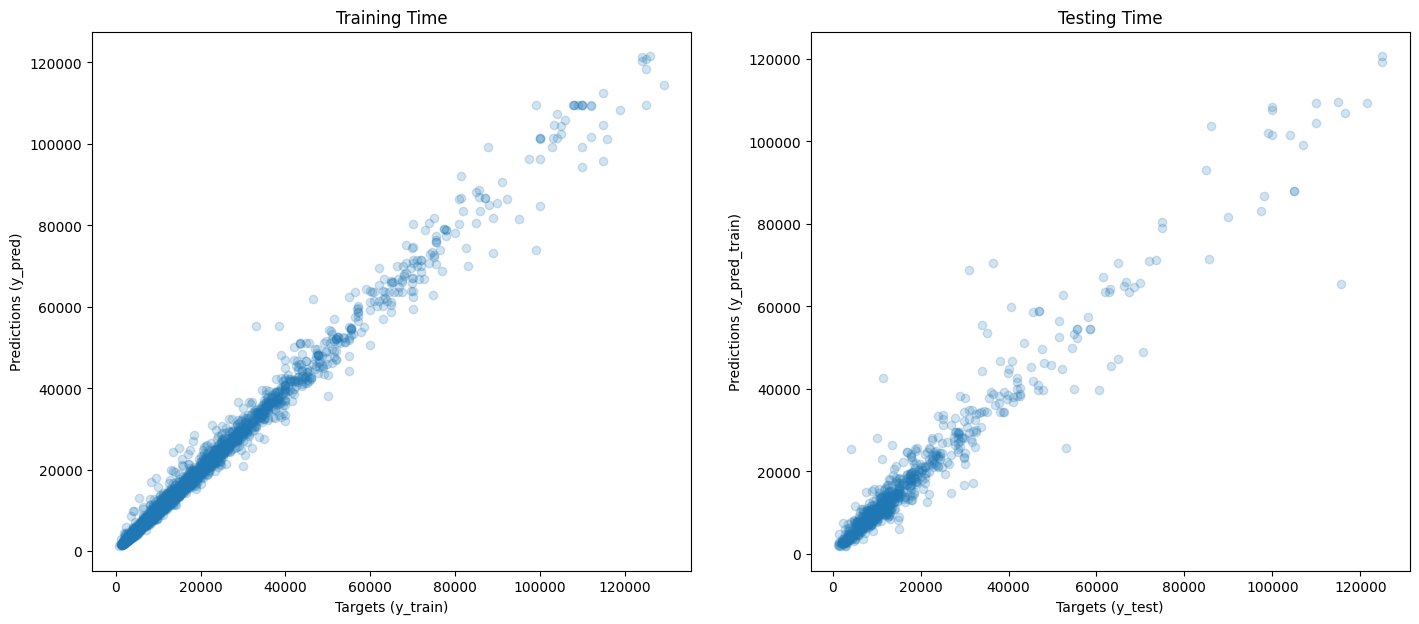

In [306]:

plt.figure(figsize=(17,7))
y_pred_train=rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train,alpha=0.2)
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Training Time')



y_pred_test=rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time')

Text(0.5, 1.0, 'Testing Residual pdf')

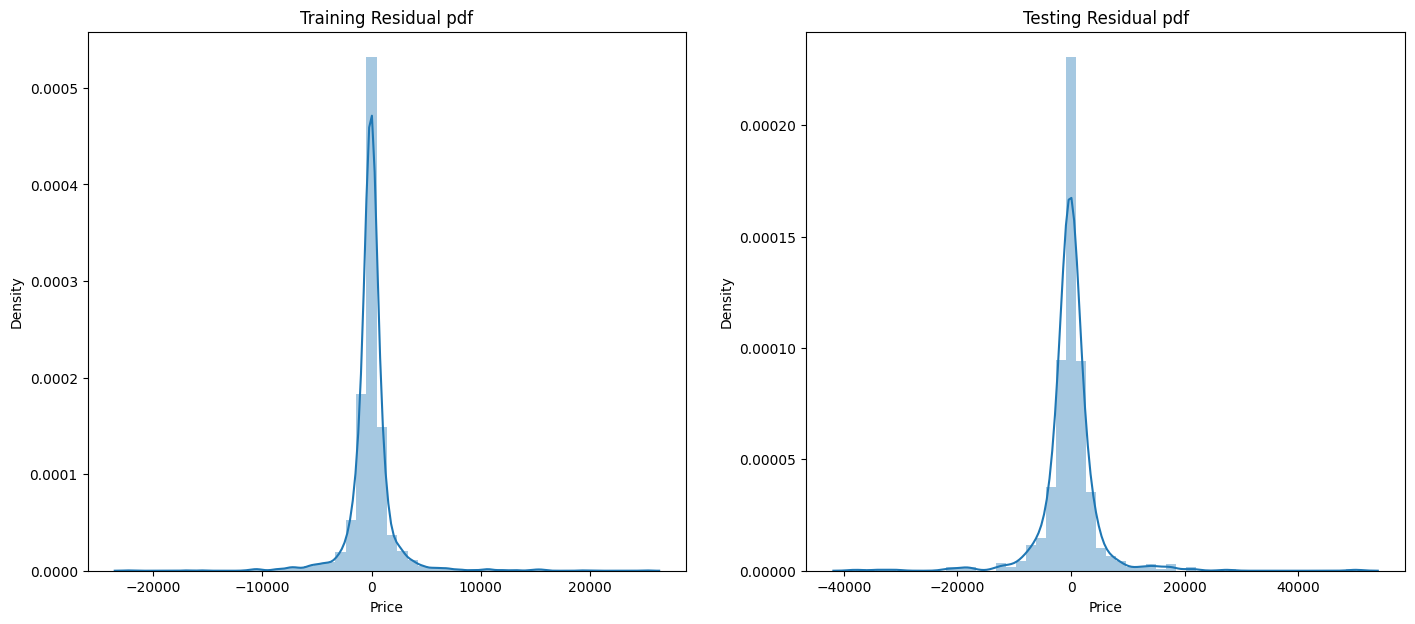

In [307]:
residual_train=(y_train -rf_1.predict(X_train))
residual_test=(y_test -rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train)
plt.title('Training Residual pdf')

plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual pdf')

In [308]:
df_eval=pd.DataFrame(rf_1.predict(X_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_eval['Tareget']=y_test
df_eval['Residual']=df_eval['Tareget']-df_eval['Prediction']
df_eval['Difference%']=np.absolute(df_eval['Residual']/df_eval['Tareget']*100)
df_eval

,Prediction,Tareget,Residual,Difference%
0,17395.610000,19000.0,1604.390000,8.444158
1,6139.810000,5500.0,-639.810000,11.632909
2,25596.970000,19200.0,-6396.970000,33.317552
3,12604.616667,11900.0,-704.616667,5.921148
4,8366.430000,7750.0,-616.430000,7.953935
...,...,...,...,...
769,106790.000000,116500.0,9710.000000,8.334764
770,10989.938333,13200.0,2210.061667,16.742891
771,28285.002381,27500.0,-785.002381,2.854554
772,14968.430000,16500.0,1531.570000,9.282242


In [309]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18811.308969,18602.017829,-209.291140,16.980747
std,19440.720086,20139.559184,4919.293807,29.144771
min,1859.080000,1200.000000,-37946.770000,0.000000
25%,7796.327500,7500.000000,-1358.410000,4.231623
50%,11888.215000,11900.000000,-181.280000,9.693490
75%,21758.132500,20999.060000,1045.540000,20.830559
max,120712.000000,125000.000000,50091.470833,521.972683


In [201]:
from sklearn.model_selection import RandomizedSearchCV

rf_random=RandomForestRegressor()

random_grid={'bootstrap':[True,False],
             'max_depth':[10,20,30,40,50,None],
             'max_features':['auto','sqrt'],
             'min_samples_leaf':[1,2,4],
             'min_samples_split':[2,5,7],
             'n_estimators':[100,200]}


rf_random=RandomizedSearchCV(estimator=rf_random,param_distributions=random_grid,n_iter=100,cv=3,verbose=8,n_jobs=-1)
rf_random.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [202]:
rf_random.best_estimator_,rf_random.best_params_,rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt'),
 {'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 30,
  'bootstrap': False},
 0.925934191831408)

In [203]:
np.sqrt(mean_squared_error(y_train,rf_random.predict(X_train)))

630.1714646855766

In [204]:
np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test)))

4289.407381622954

In [205]:
from sklearn.model_selection import GridSearchCV
rf_grid_model=RandomForestRegressor()
param_grid={'bootstrap':[False],
             'max_depth':[25,30,35],
             'max_features':['sqrt'],
             'min_samples_leaf':[1,2],
             'min_samples_split':[1,2,3],
             'n_estimators':[100,150,200]}

rf_grid =GridSearchCV(estimator=rf_grid_model,
                      param_grid=param_grid,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
rf_grid.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [206]:
rf_grid.best_estimator_,rf_grid.best_params_,rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9282317815962756)

In [207]:
np.sqrt(mean_squared_error(y_train,rf_grid.predict(X_train)))

630.1823249192694

In [208]:
np.sqrt(mean_squared_error(y_test,rf_grid.predict(X_test)))

4195.190022305738

In [209]:
rf_grid_model_2=RandomForestRegressor()
param_grid_2={'bootstrap':[False],
             'max_depth':[28,30,32],
             'max_features':['sqrt'],
             'min_samples_leaf':[1],
             'min_samples_split':[2,3,4],
             'n_estimators':[50,80,100]}

rf_grid_2 =GridSearchCV(estimator=rf_grid_model_2,
                      param_grid=param_grid_2,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
rf_grid_2.fit(X_train,y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [210]:
rf_grid_2.best_estimator_,rf_grid_2.best_params_,rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                       min_samples_split=4),
 {'bootstrap': False,
  'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.9287672064722804)

In [211]:
np.sqrt(mean_squared_error(y_train,rf_grid_2.predict(X_train)))

1366.9568130610844

In [212]:
np.sqrt(mean_squared_error(y_test,rf_grid_2.predict(X_test)))

4287.884953619723

Text(0.5, 1.0, 'Testing Time')

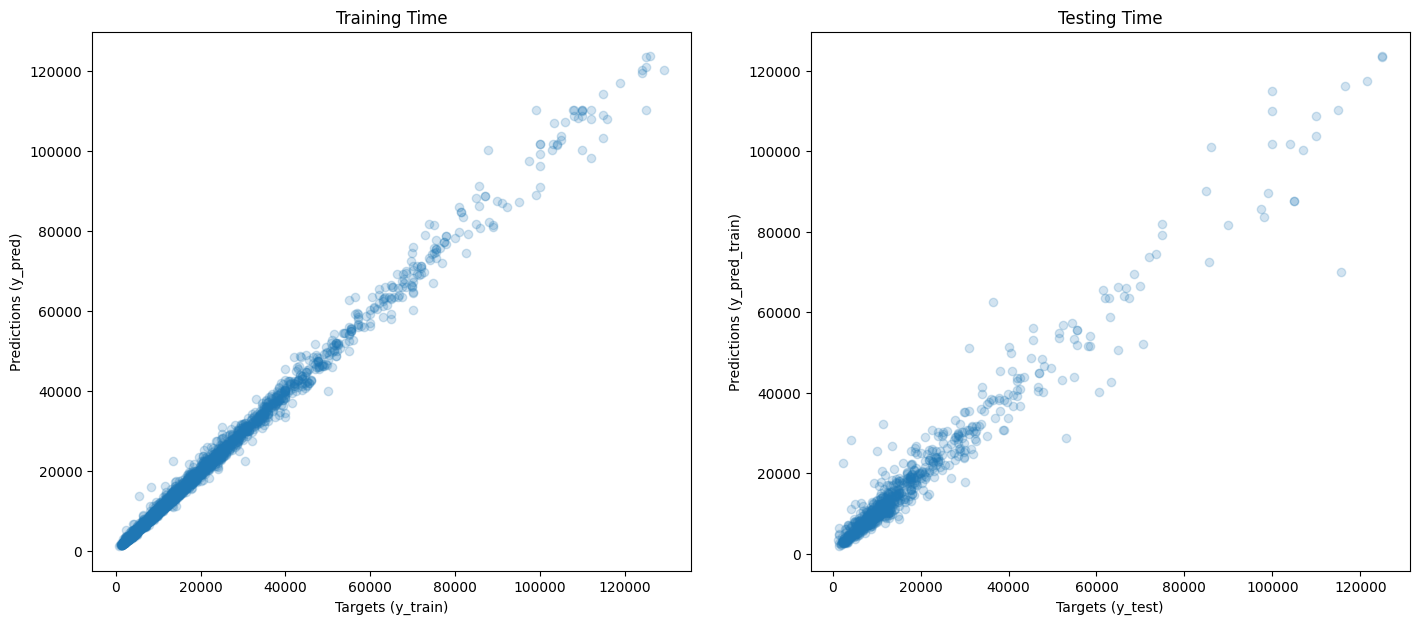

In [213]:
plt.figure(figsize=(17,7))
y_pred_train=rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train,alpha=0.2)
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Training Time')



y_pred_test=rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time')

In [214]:
from sklearn.metrics import r2_score

print(f'Training r2_score:{r2_score(y_train,rf_grid_2.predict(X_train))}')
print(f'Testting r2_score:{r2_score(y_test,rf_grid_2.predict(X_test))}')

Training r2_score:0.9947198841598529
Testting r2_score:0.9546112947009203


Text(0.5, 1.0, 'Testing Residual pdf')

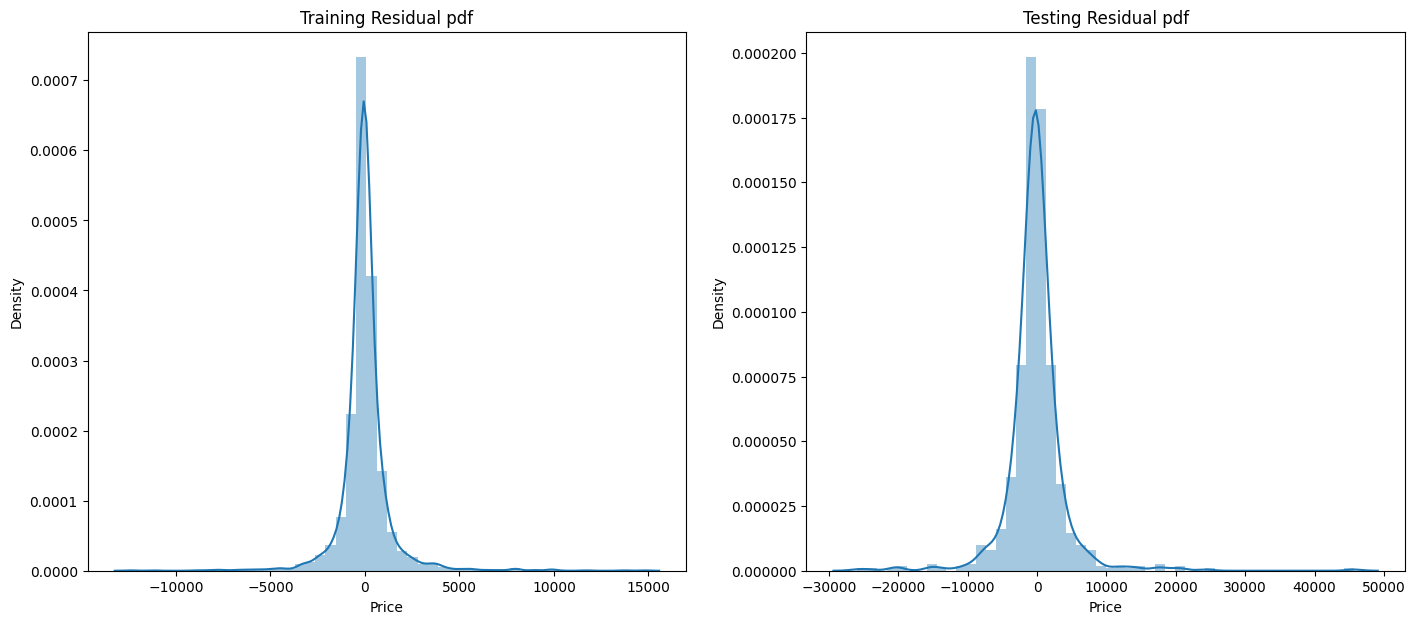

In [215]:
residual_train=(y_train -rf_grid_2.predict(X_train))
residual_test=(y_test -rf_grid_2.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train)
plt.title('Training Residual pdf')

plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual pdf')

In [216]:
df_eval=pd.DataFrame(rf_grid_2.predict(X_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_eval['Tareget']=y_test
df_eval['Residual']=df_eval['Tareget']-df_eval['Prediction']
df_eval['Difference%']=np.absolute(df_eval['Residual']/df_eval['Tareget']*100)
df_eval

,Prediction,Tareget,Residual,Difference%
0,18295.473617,19000.0,704.526383,3.708034
1,5194.960000,5500.0,305.040000,5.546182
2,24722.803333,19200.0,-5522.803333,28.764601
3,12045.023333,11900.0,-145.023333,1.218683
4,8269.030000,7750.0,-519.030000,6.697161
...,...,...,...,...
769,116230.511667,116500.0,269.488333,0.231320
770,10890.090000,13200.0,2309.910000,17.499318
771,28266.666667,27500.0,-766.666667,2.787879
772,14029.758333,16500.0,2470.241667,14.971162


In [217]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18763.339744,18602.017829,-161.321915,18.421381
std,19288.150931,20139.559184,4287.619869,43.652221
min,1848.136667,1200.000000,-25968.975000,0.000000
25%,7863.245417,7500.000000,-1375.267500,4.460483
50%,12109.456667,11900.000000,-225.630042,10.359178
75%,22017.758333,20999.060000,996.243333,20.109363
max,123606.850000,125000.000000,45724.997533,832.510069


In [218]:
import joblib

joblib.dump(rf_1,'rf1_base_rf.pkl',compress=3)

['rf1_base_rf.pkl']